 ## Import libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


## Load in the csv data

### Linear fit (Linear regression)

Fit: y = 2.028x + -0.947
Uncertainty: a = 0.052, b = 3.387


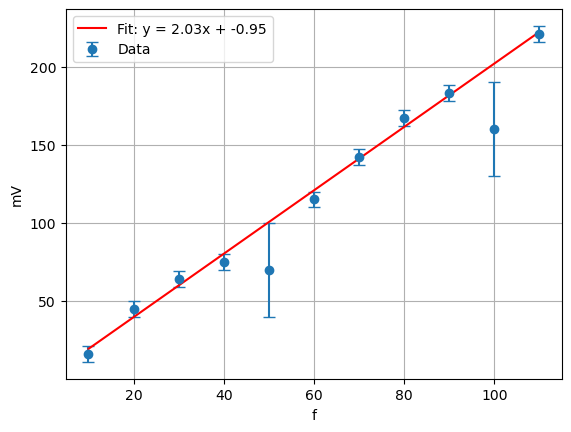

In [2]:


# Load in the linear data
data=pd.read_csv('f_to_v.csv')


# Linear function to fit
def linear(x, a, b):
    return a * x + b

# Fit the data using curve_fit with sigma for y-errors
popt, pcov = curve_fit(linear, data['f'], data['mV'], sigma=data['err in V'], absolute_sigma=True)

""" curve_fit tries to find the best a and b to fits your data.

sigma uses your y-errors to weight the fit (better points count more).

popt: best-fit parameters.

pcov: uncertainty in those parameters."""

# Get fitting parameters and their uncertainties
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))

print(f"Fit: y = {a:.3f}x + {b:.3f}")
print(f"Uncertainty: a = {a_err:.3f}, b = {b_err:.3f}")

# Plotting
plt.errorbar(data['f'], data['mV'], yerr=data['err in V'], fmt='o', label='Data', capsize=4)
x_fit = np.linspace(min(data['f']), max(data['f']), 50)
y_fit = linear(x_fit, *popt)
plt.plot(x_fit, y_fit, label='Fit: y = {:.2f}x + {:.2f}'.format(a, b), color='red')
plt.xlabel('f')
plt.ylabel('mV')
plt.legend()
plt.grid(True)
plt.show()



### Gaussian fitting

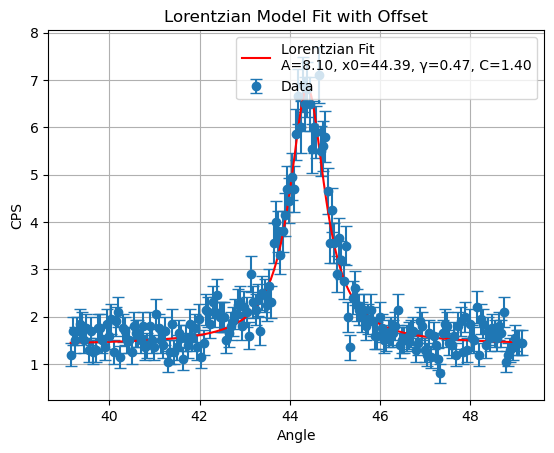

In [3]:

# Sample data — replace with your actual data
data=pd.read_csv('lorentzian_model.csv')
data.rename(columns={'CPS ': 'CPS'}, inplace=True)

# Lorentzian function with offset
def lorentzian_offset(x, A, x0, gamma, C):
    return (A / np.pi) * (gamma / ((x - x0)**2 + gamma**2)) + C

# Fit the data
popt, pcov = curve_fit(
    lorentzian_offset,
    data['Angle'],
    data['CPS'],
    sigma=data['Error'],
    absolute_sigma=True, #Makes sure errors are treated correctly
    p0=[200, 40, 10, 0]  # initial guess: [A, x0, gamma, C]
)

# Extract fitted parameters
A, x0, gamma, C = popt

# Generate smooth x values and compute the fit
x_fit = np.linspace(min(data['Angle']), max(data['Angle']), 500)
y_fit = lorentzian_offset(x_fit, *popt)

# Plot data with error bars
plt.errorbar(data['Angle'], data['CPS'], yerr=data['Error'], fmt='o', capsize=4, label='Data')

# Plot Lorentzian fit
plt.plot(x_fit, y_fit, 'r-', label=f'Lorentzian Fit\nA={A:.2f}, x0={x0:.2f}, γ={gamma:.2f}, C={C:.2f}')

plt.xlabel('Angle')
plt.ylabel('CPS')
plt.title('Lorentzian Model Fit with Offset')
plt.legend()
plt.grid(True)
plt.show()

